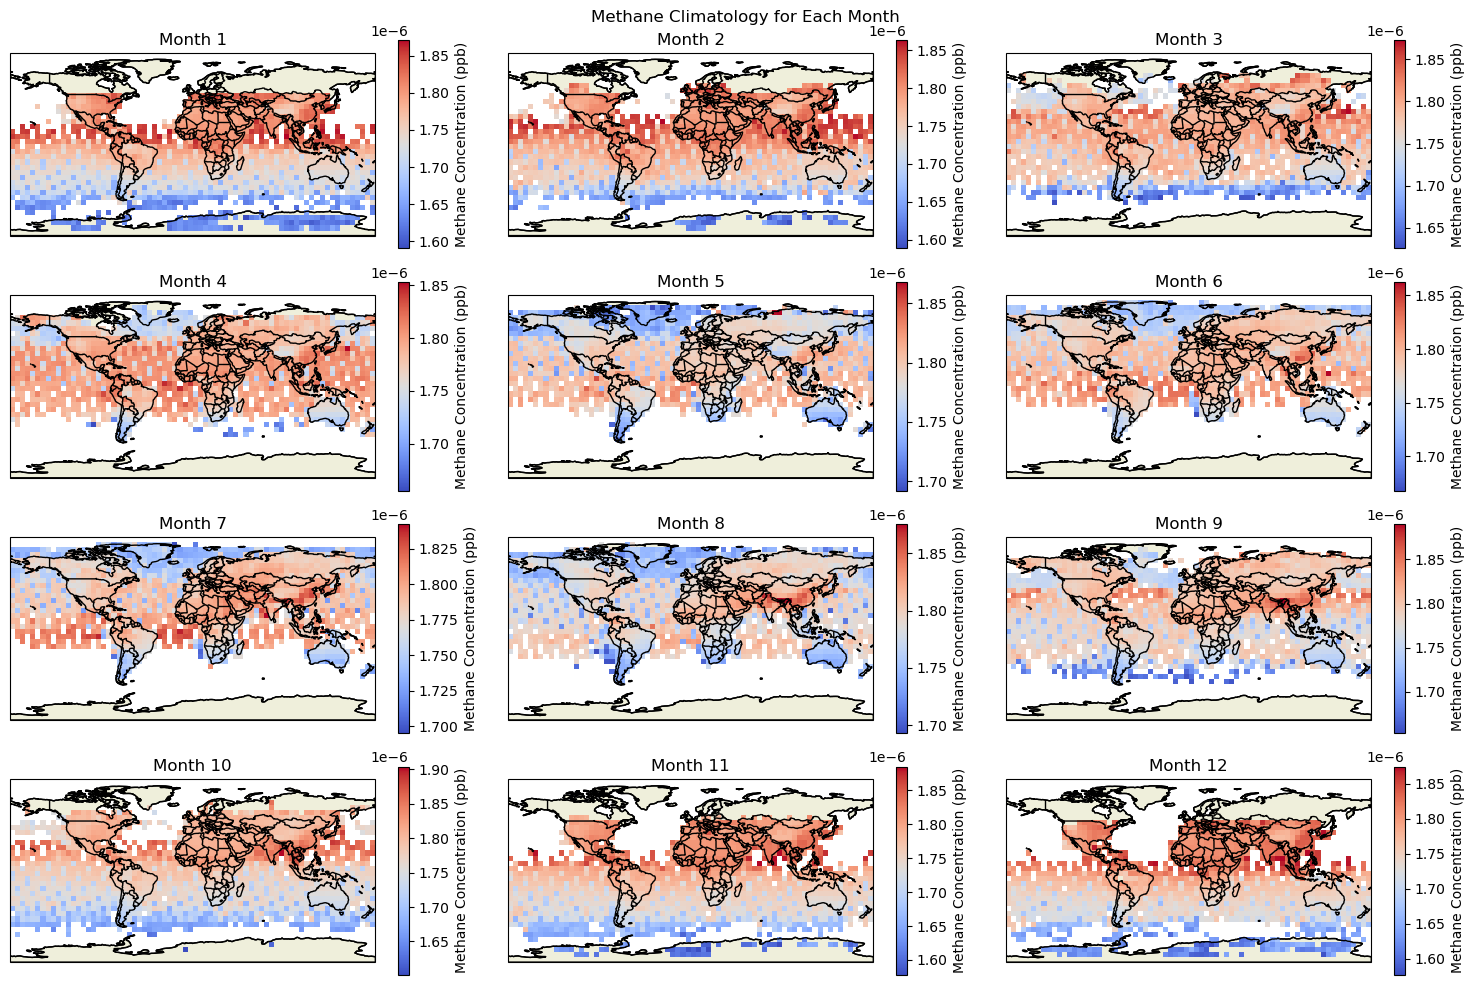

In [9]:
#1.1
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 加载文件
file_path = r'C:\Users\Administrator\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc'
data = xr.open_dataset(file_path)

# 提取甲烷数据
methane = data['xch4']

# 计算气候稳态
monthly_climatology = methane.groupby('time.month').mean(dim='time')

#绘制4行3列的画布
fig, axes = plt.subplots(4, 3, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Methane Climatology for Each Month')

# 设置小图信息
for ax in axes.ravel():
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # Set map boundaries
    ax.add_feature(cfeature.LAND, edgecolor='black')  # Add land feature
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')  # Add coastline feature
    ax.add_feature(cfeature.BORDERS, edgecolor='black')  # Add country borders feature
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# 将数据信息分别填入图片
for i, ax in enumerate(axes.ravel()):
    month_data = monthly_climatology.isel(month=i)  # Extract data for the i-th month
    
   
    month_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Methane Concentration (ppb)'})
    
   
    ax.set_title(f'Month {i+1}')

# 调整布局以避免支线剧情和标题重叠
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the suptitle
plt.show()


In [2]:
import os
print(os.getcwd())

C:\Users\Administrator


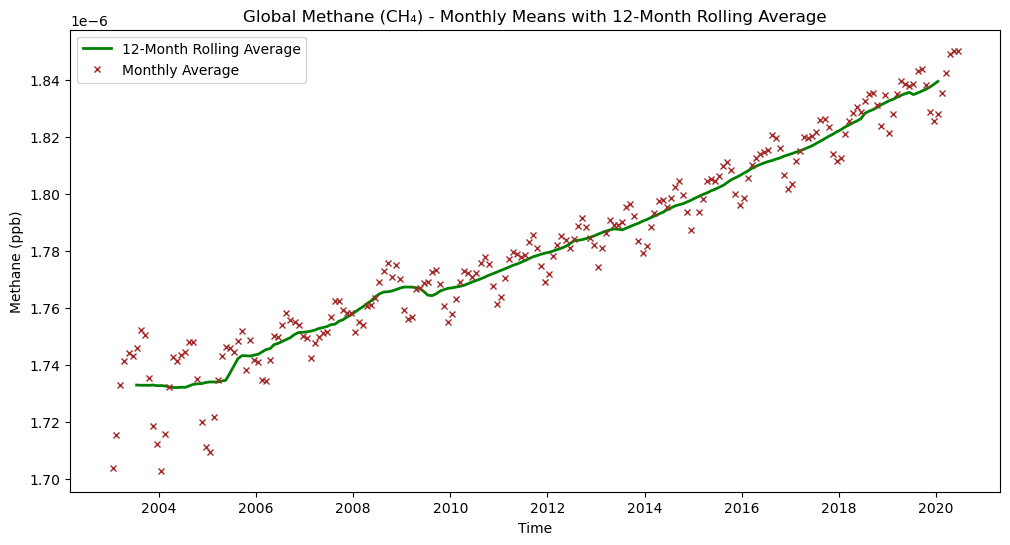

In [21]:
#1.2
import numpy as np
import matplotlib.pyplot as plt

# 提取甲烷数据并计算全球平均
global_avg_methane = methane.mean(dim=['lat', 'lon'])

# 对数据进行插值填补缺失值
global_avg_methane_interp = global_avg_methane.interpolate_na(dim="time", method="linear")

# 计算滚动平均（设置窗口大小为12个月）
rolling_avg = global_avg_methane_interp.rolling(time=12, center=True).mean()

# 绘制全球甲烷时间序列图
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制12个月滚动平均值
ax.plot(rolling_avg['time'], rolling_avg, color='green', linewidth=2, label='12-Month Rolling Average')

# 绘制原始的甲烷平均值数据点（可选）
ax.plot(global_avg_methane['time'], global_avg_methane, color='brown', marker='x', linestyle='', label='Monthly Average', markersize=4)

# 设置图表标题和标签
ax.set_title("Global Methane (CH₄) - Monthly Means with 12-Month Rolling Average")
ax.set_xlabel("Time")
ax.set_ylabel("Methane (ppb)")

# 显示图例
ax.legend(loc='upper left')

# 显示绘图
plt.show()

#甲烷浓度表现出季节性波动，存在周期性波峰波谷。
#整体趋势不断提高，表明甲烷排放水平逐年提升。
#部分数据偏离或缺失，表明测量存在异常或者当年有异常事故或气候问题。

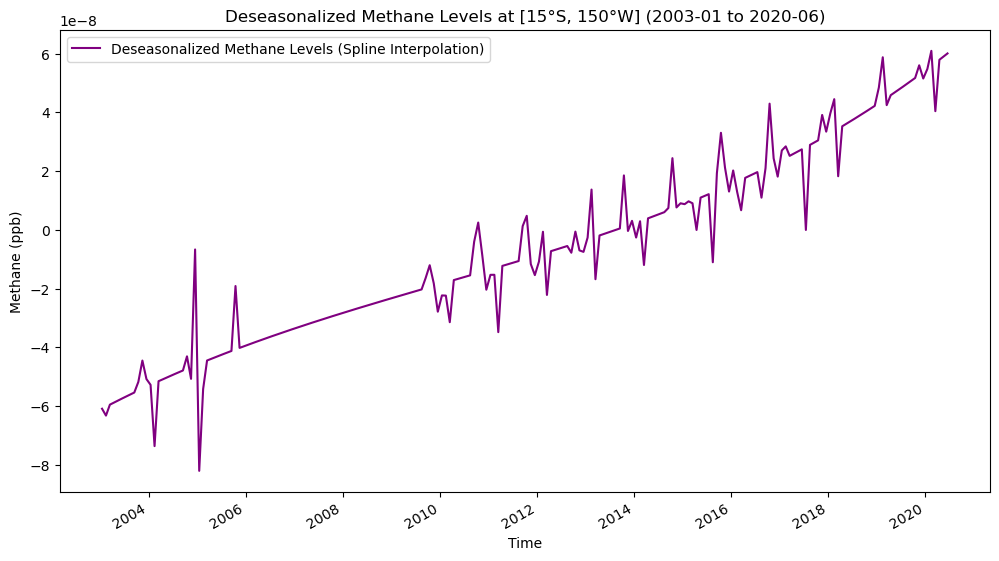

In [18]:
#1.3
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Select methane data at the specified location
file_path = r'C:\Users\Administrator\200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc' 
data = xr.open_dataset(file_path)
point_data = data['xch4'].sel(lat=-15, lon=-150, method='nearest')

# 计算月度气候学平均值
monthly_climatology = point_data.groupby('time.month').mean()

# 去季节化处理
deseasonalized_data = point_data.groupby('time.month') - monthly_climatology

# 进行Spline插值来填补缺失值
deseasonalized_data_interp = deseasonalized_data.interpolate_na(dim="time", method="spline", order=3)

# 绘制去季节化后的甲烷浓度时间序列
plt.figure(figsize=(12, 6))
deseasonalized_data_interp.plot(label='Deseasonalized Methane Levels (Spline Interpolation)', color='purple')
plt.title("Deseasonalized Methane Levels at [15°S, 150°W] (2003-01 to 2020-06)")
plt.xlabel("Time")
plt.ylabel("Methane (ppb)")
plt.legend()
plt.show()


In [10]:
#2.1
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

file_path = r'C:\Users\Administrator\NOAA_NCDC_ERSST_v3b_SST.nc'
ds = xr.open_dataset(file_path)

group_ds=ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).groupby('time.month')
ds_anom=group_ds - group_ds.mean()
ds_anom

<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.43157768, -0.41846275, -0.39795303, ..., -0.2116642 ,
         -0.23776245, -0.24401474],
        [-0.41259003, -0.4067192 , -0.3875141 , ..., -0.52064896,
         -0.5346451 , -0.51997185],
        [-0.40932274, -0.39743805, -0.36237717, ..., -0.6373882 ,
         -0.6171951 , -0.583725  ],
        [-0.4140854 , -0.37909317, -0.3215618 , ..., -0.43292618,
         -0.38404274, -0.3352623 ],
        [-0.5043678 , -0.43894005, -0.3710251 , ..., -0.17453575,
         -0.11044502, -0.06918144]],

       [[-0.5374584 , -0.52739716, -0.50823593, ..., -0.40254593,
         -0.44382668, -0.45287704],
        [-0.55093956, -0.539135  , -0.51673317, ..., -0.6660595 ,
         -0.7127285 , -0.710968  ],
        [-0.61242104, -0.5959244 , -0.5572338 , ..., -0.7235069 ,
         -0.7326374 , -0.73106194],
        [-0.6798363 , -0.6483364 , -0.5889931 , ..., -0.5397434 ,
         -0.50793266, -0.49977684],
        [-0.7830448 , -0.7286701 , -0.6683655 , ..., -0.33967972,
...
         -0.2555828 , -0.13972664],
        [-0.989378  , -1.0497723 , -1.0954857 , ..., -0.86087227,
         -0.7690697 , -0.65498734],
        [-1.1887245 , -1.252285  , -1.3029232 , ..., -1.0460625 ,
         -0.9661274 , -0.8785801 ],
        [-1.002367  , -1.0756893 , -1.1325111 , ..., -0.7207298 ,
         -0.6597252 , -0.5900669 ],
        [-0.5770798 , -0.65514374, -0.72174263, ..., -0.4353485 ,
         -0.36265945, -0.28103828]],

       [[-0.3578701 , -0.41542053, -0.47110367, ..., -0.2400589 ,
         -0.1464405 , -0.03788376],
        [-0.7678585 , -0.83501625, -0.9024124 , ..., -0.727829  ,
         -0.61603355, -0.48027992],
        [-0.96187973, -1.0445309 , -1.1224213 , ..., -0.9327831 ,
         -0.81235695, -0.6655674 ],
        [-0.82112694, -0.9206734 , -1.0085506 , ..., -0.6531601 ,
         -0.5626869 , -0.4374504 ],
        [-0.4864292 , -0.5823746 , -0.6702862 , ..., -0.36221695,
         -0.30041504, -0.1987915 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

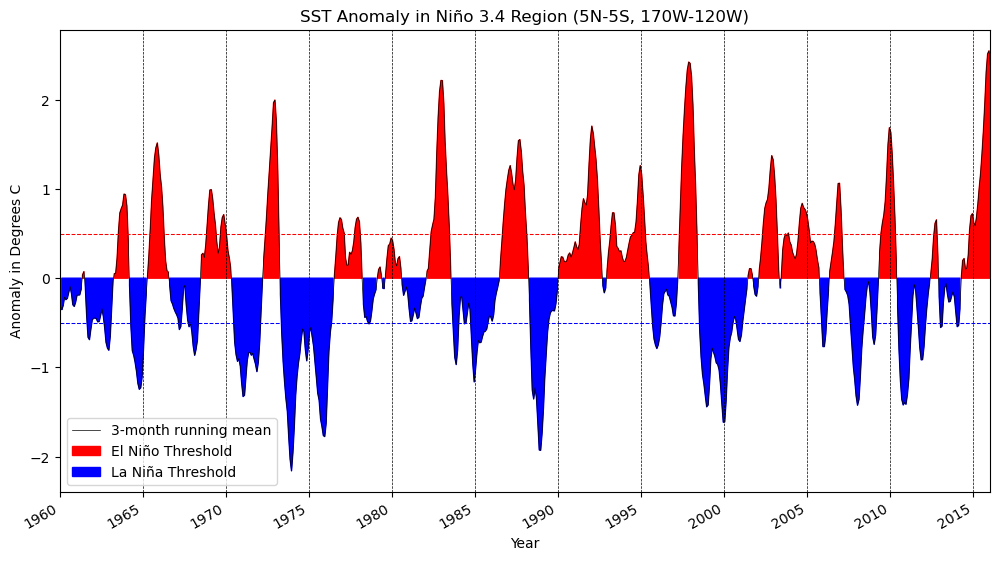

In [3]:
#2.2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# 加载数据
file_path = r'C:\Users\Administrator\NOAA_NCDC_ERSST_v3b_SST.nc'
ds = xr.open_dataset(file_path)
mean_ds = ds.sst.sel(lat=slice(-5, 5), lon=slice(190,240)).mean(dim=['lat', 'lon'])
rolling_ds = mean_ds.rolling(time=3, center=True).mean()
group_ds=rolling_ds.groupby('time.month')
ds_anom=group_ds - group_ds.mean()


# 绘制图表
plt.figure(figsize=(12, 6))
ds_anom.plot(color='black', linewidth=0.5, label='3-month running mean')

# 填充 El Niño 和 La Niña 阈值区域
plt.fill_between(
    ds_anom.time.values,
    ds_anom.values,
    0,
    where=(ds_anom > 0),
    color='red',
    label='El Niño Threshold',
)
plt.fill_between(
    ds_anom.time.values,
    ds_anom.values,
    0,
    where=(ds_anom < 0),
    color='blue',
    label='La Niña Threshold',
)

# 添加阈值线
plt.axhline(0.5, color='red', linestyle='--', linewidth=0.75)
plt.axhline(-0.5, color='blue', linestyle='--', linewidth=0.75)

# 设置横坐标每 5 年为一个间隔
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 在每个分隔处添加向上的黑色虚线
for year in range(int(ds_anom.time.dt.year.min()), int(ds_anom.time.dt.year.max()), 5):
    plt.axvline(pd.Timestamp(year=year, month=1, day=1), color='black', linestyle='--', linewidth=0.5)

# 设置紧凑的 x 轴范围
start_year = int(ds_anom.time.dt.year.min())
end_year = int(ds_anom.time.dt.year.max())
plt.xlim(pd.Timestamp(year=start_year, month=1, day=1), pd.Timestamp(year=end_year, month=1, day=1))

# 设置标签和标题
plt.title("SST Anomaly in Niño 3.4 Region (5N-5S, 170W-120W)")
plt.ylabel("Anomaly in Degrees C")
plt.xlabel("Year")
plt.legend()
plt.show()


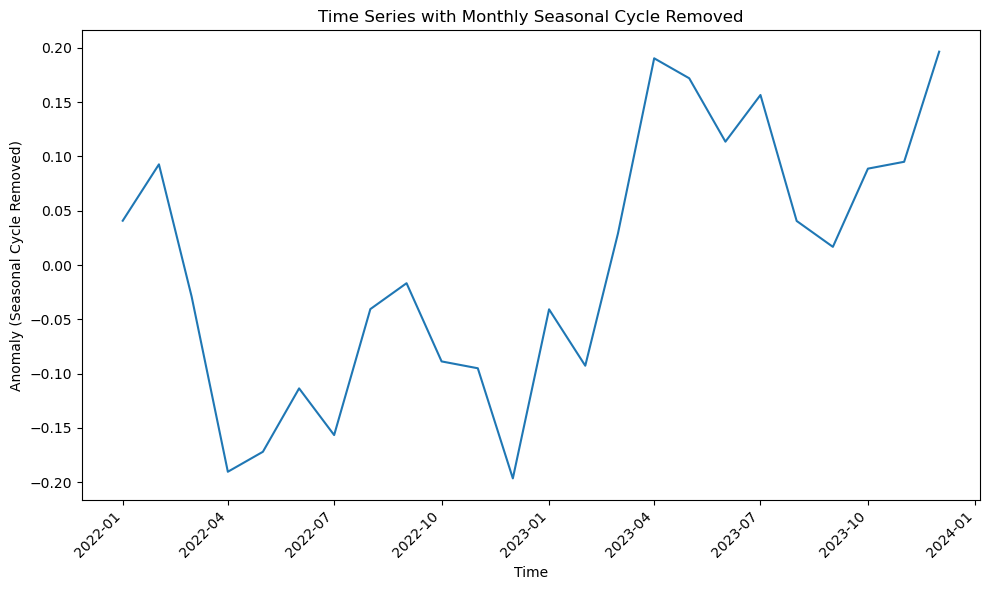

In [20]:
#3.1
#数据下载地址在pdf的第二页
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# 生成文件路径列表
file_paths = [
    f"MERRA2_400.instM_2d_asm_Nx.{year}{month:02d}.nc4"
    for year in range(2022, 2024)  # 2022到2023
    for month in range(1, 13)      # 从1月到12月
]

# 打开多个文件并合并成一个大数据集
ds = xr.open_mfdataset(file_paths, combine='by_coords')

# 选择区域并进行按月分组
group_ds = ds.TS.sel(lat=slice(-5, 5), lon=slice(120, 170)).groupby('time.month')

# 去除季节性周期（即每月的平均值）
ds_anom = group_ds - group_ds.mean()

# 提取去季节化后的数据
ds_anom_time_series = ds_anom.mean(dim=["lat", "lon"])

# 绘制时间序列
plt.figure(figsize=(10, 6))
ds_anom_time_series.plot()

# 添加标题和标签
plt.title('Time Series with Monthly Seasonal Cycle Removed')
plt.xlabel('Time')
plt.ylabel('Anomaly (Seasonal Cycle Removed)')

# 设置x轴格式为年月
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# 显示图形
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

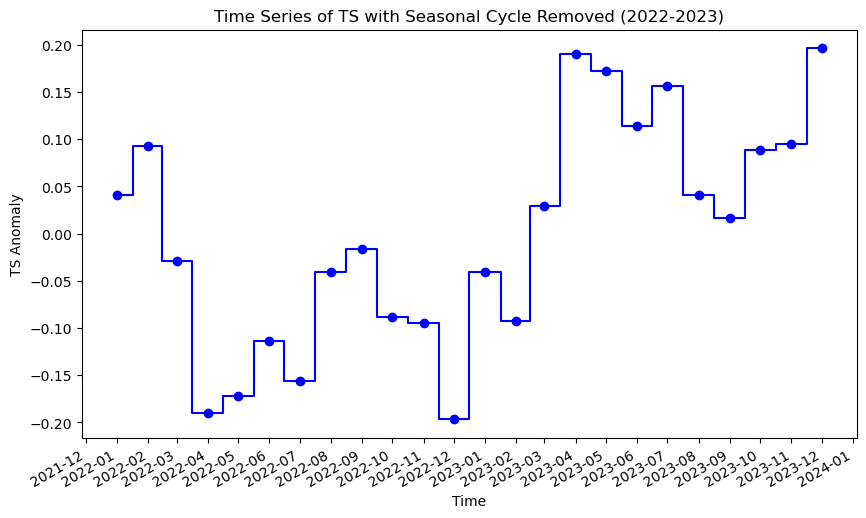

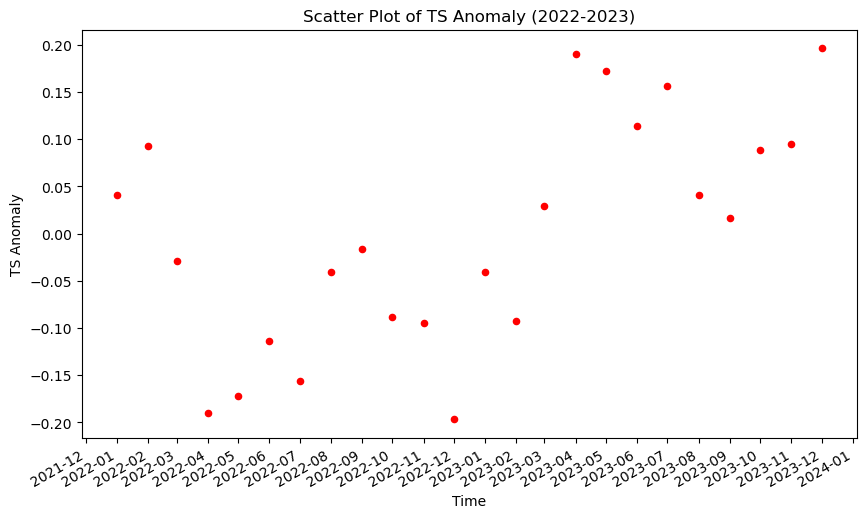

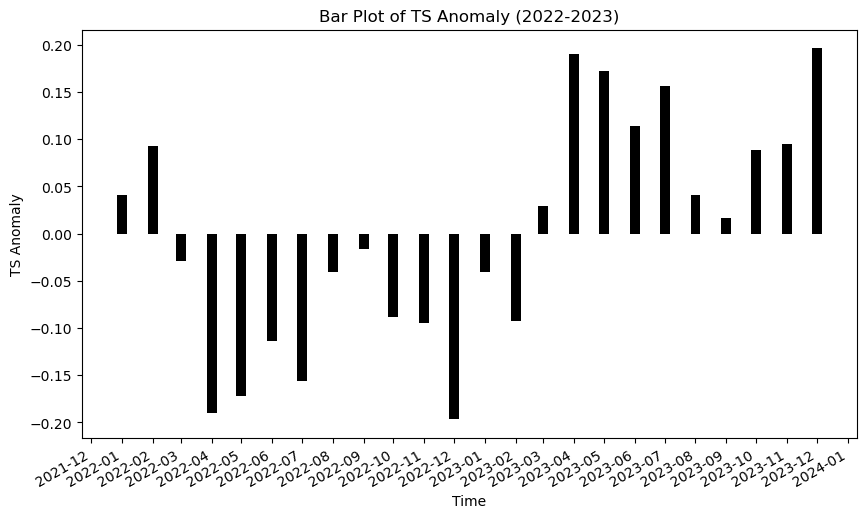

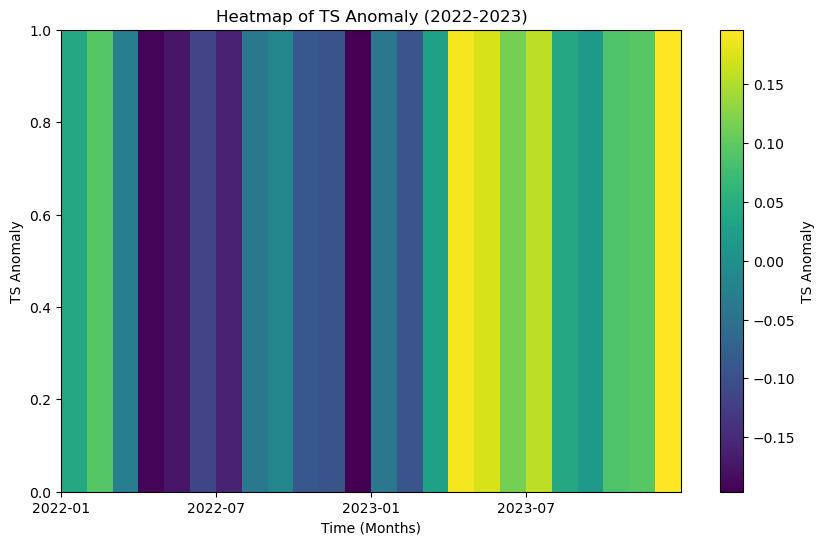

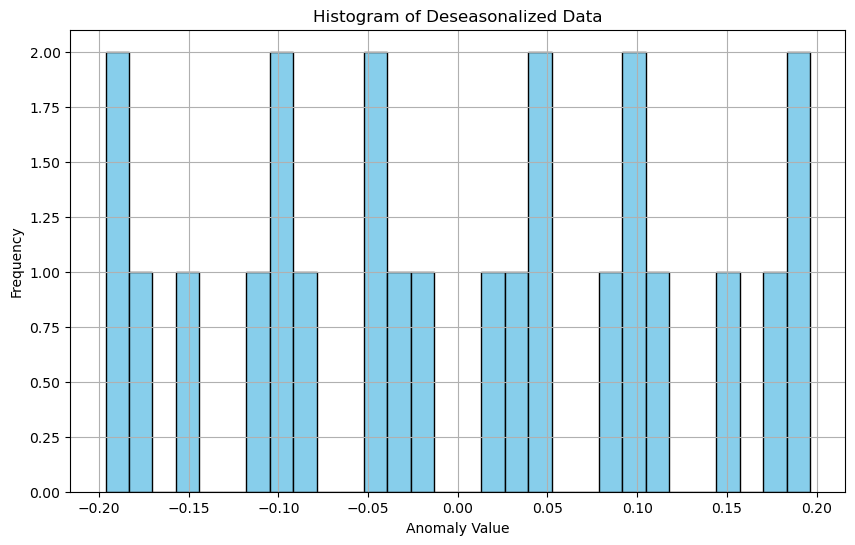

In [40]:
#3.2
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

# 生成文件路径列表
file_paths = [
    f"MERRA2_400.instM_2d_asm_Nx.{year}{month:02d}.nc4"
    for year in range(2022, 2024)  # 2022到2023
    for month in range(1, 13)      # 从1月到12月
]

# 打开多个文件并合并成一个大数据集
ds = xr.open_mfdataset(file_paths, combine='by_coords')
# 选择区域并进行按月分组
group_ds = ds.TS.sel(lat=slice(-5, 5), lon=slice(120, 170)).groupby('time.month')

# 去除季节性周期（即每月的平均值）
ds_anom = group_ds - group_ds.mean()

# 提取去季节化后的数据
ds_anom_time_series = ds_anom.mean(dim=["lat", "lon"])

# 1. 时间序列阶梯图 
plt.figure(figsize=(10, 6))
ds_anom_time_series.plot.step(x="time", where="mid", marker='o', color='b')  # 'where' 设置为 'mid' 以获得中间阶梯效果
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title("Time Series of TS with Seasonal Cycle Removed (2022-2023)")
plt.xlabel("Time")
plt.ylabel("TS Anomaly")
plt.show()


# 2. 散点图 
plt.figure(figsize=(10, 6))
plt.scatter(ds_anom_time_series.time, ds_anom_time_series, color='r', s=20)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title("Scatter Plot of TS Anomaly (2022-2023)")
plt.xlabel("Time")
plt.ylabel("TS Anomaly")
plt.show()

# 3. 柱状图 
plt.figure(figsize=(10, 6))
plt.bar(ds_anom_time_series.time, ds_anom_time_series, color='k', width=10.0)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()
plt.title("Bar Plot of TS Anomaly (2022-2023)")
plt.xlabel("Time")
plt.ylabel("TS Anomaly")
plt.show()


# 4. 热力图 (Heatmap)
# 将时间序列数据转换为二维数组，方便绘制热力图
heatmap_data = ds_anom.mean(dim=["lat", "lon"]).values.reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data.T, aspect='auto', cmap='viridis', interpolation='nearest', extent=[0, len(ds_anom_time_series), 0, 1])
plt.colorbar(label="TS Anomaly")
plt.title("Heatmap of TS Anomaly (2022-2023)")
plt.xlabel("Time (Months)")
plt.ylabel("TS Anomaly")
plt.xticks(np.arange(0, len(ds_anom_time_series), 6), ds_anom_time_series.time.dt.strftime('%Y-%m').values[::6])
plt.show()

#5. 异常值的频率直方图
plt.figure(figsize=(10, 6))
ds_anom_time_series.values.flatten()  # Flatten to 1D array
plt.hist(ds_anom_time_series.values.flatten(), bins=30, edgecolor='black', color='skyblue')
plt.title('Histogram of Deseasonalized Data')
plt.xlabel('Anomaly Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [30]:
import json
from nbformat import read, write

def extract_comments_from_cell(cell):
    comments = []
    for line in cell.source.split('\n'):
        if line.strip().startswith('#'):
            comments.append(line)
    return comments

def extract_comments_from_notebook(notebook_path):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        nb = read(f, as_version=4)
    comments = []
    for cell in nb.cells:
        if cell.cell_type == 'code':
            comments.extend(extract_comments_from_cell(cell))
    return comments

# 替换为你的Jupyter Notebook文件路径
notebook_path = 'PS3.ipynb'
comments = extract_comments_from_notebook(notebook_path)

# 将批注保存到文本文件
with open('comments.txt', 'w', encoding='utf-8') as f:
    for comment in comments:
        f.write(comment + '\n')

# 打印批注
comments

['#1.1',
 '# 加载文件',
 '# 提取甲烷数据',
 '# 计算气候稳态',
 '#绘制4行3列的画布',
 '# 设置小图信息',
 '# 将数据信息分别填入图片',
 '# 调整布局以避免支线剧情和标题重叠',
 '#1.2',
 '# 提取甲烷数据并计算全球平均',
 '# 对数据进行插值填补缺失值',
 '# 计算滚动平均（设置窗口大小为12个月）',
 '# 绘制全球甲烷时间序列图',
 '# 绘制12个月滚动平均值',
 '# 绘制原始的甲烷平均值数据点（可选）',
 '# 设置图表标题和标签',
 '# 显示图例',
 '# 显示绘图',
 '#甲烷浓度表现出季节性波动，存在周期性波峰波谷。',
 '#整体趋势不断提高，表明甲烷排放水平逐年提升。',
 '#部分数据偏离或缺失，表明测量存在异常或者当年有异常事故或气候问题。',
 '#1.3',
 '# Select methane data at the specified location',
 '# 计算月度气候学平均值',
 '# 去季节化处理',
 '# 进行Spline插值来填补缺失值',
 '# 绘制去季节化后的甲烷浓度时间序列',
 '#2.1',
 '#2.2',
 '# 加载数据',
 '# 绘制图表',
 '# 填充 El Niño 和 La Niña 阈值区域',
 '# 添加阈值线',
 '# 设置横坐标每 5 年为一个间隔',
 '# 在每个分隔处添加向上的黑色虚线',
 '# 设置紧凑的 x 轴范围',
 '# 设置标签和标题',
 '#3.1',
 '# 生成文件路径列表',
 '# 打开多个文件并合并成一个大数据集',
 '# 选择区域并进行按月分组',
 '# 去除季节性周期（即每月的平均值）',
 '# 提取去季节化后的数据',
 '# 绘制时间序列',
 '# 添加标题和标签',
 '# 设置x轴格式为年月',
 '# 显示图形',
 '#3.2',
 '# 生成文件路径列表',
 '# 打开多个文件并合并成一个大数据集',
 '# 选择区域并进行按月分组',
 '# 去除季节性周期（即每月的平均值）',
 '# 提取去季节化后的数据',
 '# 1. 时间序列阶梯图 ',
 '# 2. 散点图 ',
 '# 3. 柱状图 ',
 '# 4. 热力图